In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


**PROJECT SCOPING**

1. Goals
    1. Create machine to predict poker hand class
2. Actions
    1. Try different models
    2. Train model
    3. Improve accuracy
3. Data
    1. Read data
    2. Prepare data(try prunning rank of cards to 1-5,6-9, 10-13)
    3. Choose X and y
4. Anaysis
    1. It involve prediction

**READING DATA FROM FILE**

In [250]:
df = pd.read_csv("/Users/mikolaj/Documents/GitHub/ML-project-jupiter-notebook/poker-hand-testing.data.CSV", nrows = 5000)

In [251]:
columns_names = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
df.columns = columns_names
print(df)

      S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0      2   5   1   7   4   9   4   8   3   9      1
1      3   1   3   9   4   1   4   7   3  11      1
2      2   3   2   2   4   2   3   5   4  12      1
3      3   1   2   4   3   7   4  12   4  10      0
4      1  11   2  12   4   9   1   9   4   7      1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
4995   2   8   2   1   1   1   2   7   4  13      1
4996   2  12   1   9   2  11   3   1   3   3      0
4997   2   4   1   3   2   5   1   5   3   9      1
4998   1  13   3  12   2  10   1   7   1   4      0
4999   4  13   1   2   4  11   1   7   4   2      1

[5000 rows x 11 columns]


**PREVIEW THE DATA**

In [252]:
print(df.head())
print(df.info())

   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   2   5   1   7   4   9   4   8   3   9      1
1   3   1   3   9   4   1   4   7   3  11      1
2   2   3   2   2   4   2   3   5   4  12      1
3   3   1   2   4   3   7   4  12   4  10      0
4   1  11   2  12   4   9   1   9   4   7      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      5000 non-null   int64
 1   C1      5000 non-null   int64
 2   S2      5000 non-null   int64
 3   C2      5000 non-null   int64
 4   S3      5000 non-null   int64
 5   C3      5000 non-null   int64
 6   S4      5000 non-null   int64
 7   C4      5000 non-null   int64
 8   S5      5000 non-null   int64
 9   C5      5000 non-null   int64
 10  CLASS   5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB
None


**CREATING CORRELATION HEAT MAP**

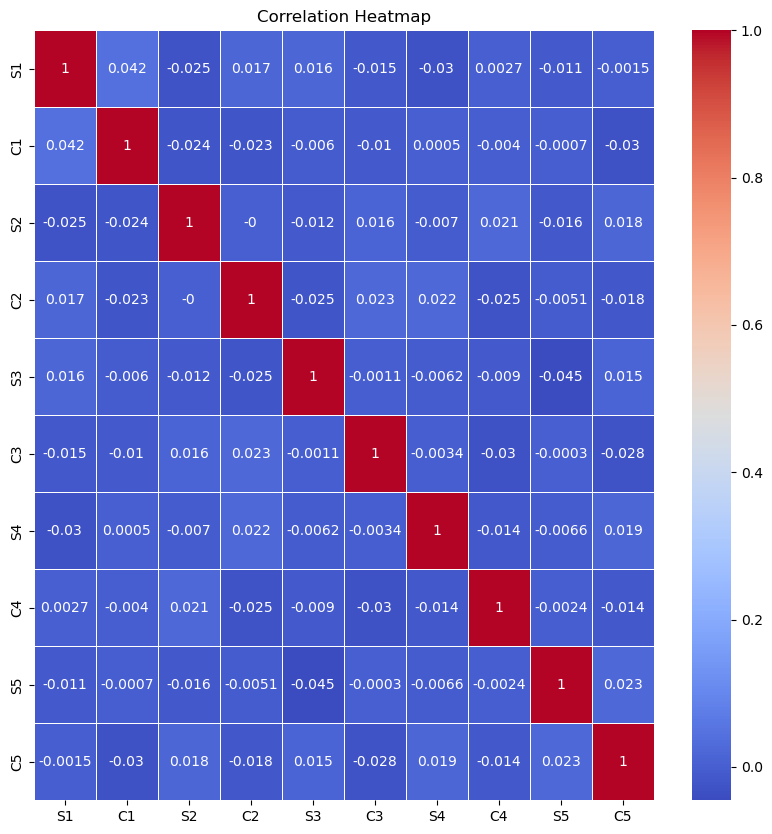

In [253]:
features_df = df.drop(columns = "CLASS")
correlation_matrix = features_df.corr().round(4)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


**FEATURE ENGINEERING**

In [254]:
rank_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Old rangs (1-5) map to 1
    6: 2, 7: 2, 8: 2, 9: 2,        # Old rangs (6-9) map to 2
    10: 3, 11: 3, 12: 3, 13: 3     # Old rangs (10-13) map to 3
}
for column in ['C1', 'C2', 'C3', 'C4', 'C5']:
    df[column] = df[column].replace(rank_mapping)
print(df)

target_column = 'CLASS'
feature_columns = [col for col in columns_names if col != target_column]

X = pd.get_dummies(df[feature_columns], drop_first=True)
y = df[target_column]

ran_state = 1
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = ran_state)

      S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0      2   1   1   2   4   2   4   2   3   2      1
1      3   1   3   2   4   1   4   2   3   3      1
2      2   1   2   1   4   1   3   1   4   3      1
3      3   1   2   1   3   2   4   3   4   3      0
4      1   3   2   3   4   2   1   2   4   2      1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
4995   2   2   2   1   1   1   2   2   4   3      1
4996   2   3   1   2   2   3   3   1   3   1      0
4997   2   1   1   1   2   1   1   1   3   2      1
4998   1   3   3   3   2   3   1   2   1   1      0
4999   4   3   1   1   4   3   1   2   4   1      1

[5000 rows x 11 columns]


**TEST DIFFERENT ML MODELS**
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine
5. K Nearest Neighbour
6. Naive Bayes
7. Gradient Boosting
8. Stacking Classifier

**Logistic Regression**


In [197]:
#Logistic Regression without Hyperparameter Tuning implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 5000, random_state = ran_state)
lr.fit(x_train, y_train)
print(f"Logistic Regression without Hyperparameter Tuning = {lr.score(x_test, y_test)}")
# Logistic Regression score without Hyperparameter Tuning = 0.494

Logistic Regression without Hyperparameter Tuning = 0.494


In [259]:
#Logistic Regression with Hyperparameter Tuning implementation
lr = LogisticRegression(max_iter = 5000,random_state = ran_state)

#RandomizedSearchCV with Logistic Regression
param_randomized = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=100)
}
lr_randomized = RandomizedSearchCV(lr, param_randomized, random_state = ran_state, n_iter = 8)
lr_randomized.fit(x_train, y_train)

lr_randomized_table = pd.concat([pd.DataFrame(lr_randomized.cv_results_['params']), pd.DataFrame(lr_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(lr_randomized.best_params_)
print(lr_randomized.best_score_)
# lr_randomized best estimator is: 'penalty' = 'l2' and 'C' = 93.255736 

#GridSearchCV with Logistic Regression
param_grid = {'penalty' : ['l2'], 'C' : [90, 91, 92, 93, 94, 95, 96]}
lr_gridsearch = GridSearchCV(lr,param_grid)
lr_gridsearch.fit(x_train, y_train)

lr_gridsearch_table = pd.concat([pd.DataFrame(lr_gridsearch.cv_results_['params']), pd.DataFrame(lr_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(lr_gridsearch_table)
# lr_gridsearch best estimator is: 'penalty' = 'l2' and 'C' = 93 


/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/base.py", lin

           C penalty  Accuracy
0  41.702200      l1       NaN
1  93.255736      l2   0.49375
2  30.233257      l2   0.49350
3  23.608898      l2   0.49375
4  18.626021      l2   0.49350
5  66.974604      l2   0.49350
6  53.881673      l1       NaN
7  31.327352      l1       NaN


In [260]:
#Logistic Regression with best parameters score:
lr_best = LogisticRegression(penalty = 'l2', C = 93, random_state = ran_state, max_iter = 5000)
lr_best.fit(x_train, y_train)
print(f"Logistic Regression with Hyperparameter Tuning = {lr_best.score(x_test, y_test)}")
# Logistic Regression score with Hyperparameter Tuning = 0.494

Logistic Regression with Hyperparameter Tuning = 0.494


**Decision Tree**

In [202]:
#Decision Tree without Hyperparmeter Tuning implementation
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = ran_state)
tree.fit(x_train, y_train)
print(f"Decision Tree score without Hyperparameter Tuning = {tree.score(x_test, y_test)}")
# Decision Tree score without Hyperparameter Tuning = 0.437

Decision Tree score without Hyperparameter Tuning = 0.437


In [211]:
#Decision Tree with Hyperparameter Tuning impementation
tree = DecisionTreeClassifier(random_state = ran_state)

#RandomizedSearchCV with Decision Tree
param_randomized = {
    'max_depth': [None] + list(np.arange(1, 100)), 
    'min_samples_split': list(np.arange(1, 100))  
}
tree_randomized = RandomizedSearchCV(tree, param_randomized, random_state = ran_state, n_iter = 1000)
tree_randomized.fit(x_train, y_train)

tree_randomized_table = pd.concat([pd.DataFrame(tree_randomized.cv_results_['params']), pd.DataFrame(tree_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(tree_randomized.best_params_)
print(tree_randomized.best_score_)
# tree_randomized best estimator is: 'min_samples_split' = 11 and 'max_depth' = 3

#GridSearchCV with Decision Tree
param_grid = {'min_samples_split' : [9,10,11,12,13,14,15], 'max_depth' : [1,2,3,4,5,6,7]}
tree_gridsearch = GridSearchCV(tree,param_grid)
tree_gridsearch.fit(x_train, y_train)

tree_gridsearch_table = pd.concat([pd.DataFrame(tree_gridsearch.cv_results_['params']), pd.DataFrame(tree_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(tree_gridsearch_table)
# tree_gridsearch best estimator is: 'min_samples_split' = 11 and 'max_depth' = 3 

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/base.py", l

{'min_samples_split': 11, 'max_depth': 3}
0.509
    max_depth  min_samples_split  Accuracy
0           1                  9   0.50275
1           1                 10   0.50275
2           1                 11   0.50275
3           1                 12   0.50275
4           1                 13   0.50275
5           1                 14   0.50275
6           1                 15   0.50275
7           2                  9   0.49850
8           2                 10   0.49850
9           2                 11   0.49850
10          2                 12   0.49850
11          2                 13   0.49850
12          2                 14   0.49850
13          2                 15   0.49850
14          3                  9   0.50900
15          3                 10   0.50900
16          3                 11   0.50900
17          3                 12   0.50900
18          3                 13   0.50900
19          3                 14   0.50900
20          3                 15   0.50900
21    

In [255]:
#Decision Tree with best parameters score:
tree_best = DecisionTreeClassifier( max_depth = 3, min_samples_split = 11, random_state = ran_state)
tree_best.fit(x_train, y_train)
print(f"Decision Tree with Hyperparameter Tuning = {tree_best.score(x_test, y_test)}")
#Decision Tree score with Hyperparameter Tuning = 0.472

Decision Tree with Hyperparameter Tuning = 0.472


**Random Forest**

In [258]:
#Random Forest without Hyperparmeter Tuning implementation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = ran_state)
rf.fit(x_train, y_train)
print(f"Random Forest score without Hyperparameter Tuning = {rf.score(x_test, y_test)}")
# Random Forest score without Hyperparameter Tuning = 0.496

Random Forest score without Hyperparameter Tuning = 0.496


In [262]:
#Random Forest with Hyperparameter Tuning impementation
rf = RandomForestClassifier(random_state = ran_state)

# #RandomizedSearchCV with Random Forest
# param_randomized = {
#     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#     'max_features': ['log2', 'sqrt', None],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# rf_randomized = RandomizedSearchCV(rf, param_randomized, random_state = ran_state, n_iter = 50, cv = 3, verbose = 2, n_jobs = -1)
# rf_randomized.fit(x_train, y_train)

# rf_randomized_table = pd.concat([pd.DataFrame(rf_randomized.cv_results_['params']), pd.DataFrame(rf_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
# print(rf_randomized.best_params_)
# print(rf_randomized.best_score_)
# # rf_randomized best estimator is: 'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True

#GridSearchCV with Decision Tree
param_grid = {
    'n_estimators' : [1000,1100,1200,1300,1400],
    'min_samples_split' : [3,4,5,6,7],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['log2'],
    'max_depth': [30,40,50,60,70],
    'bootstrap': [True]}
rf_gridsearch = GridSearchCV(rf,param_grid)
rf_gridsearch.fit(x_train, y_train)

rf_gridsearch_table = pd.concat([pd.DataFrame(rf_gridsearch.cv_results_['params']), pd.DataFrame(rf_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(rf_gridsearch_table)
print(rf_gridsearc.best_params_)
print(rf_gridsearch.best_score_)
# tree_gridsearch best estimator is: 'min_samples_split' = 11 and 'max_depth' = 3 

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
0.524


In [264]:
#Random Forest with best parameters score:
rf_best = RandomForestClassifier(n_estimators = 1200, min_samples_leaf = 2, max_features = None, bootstrap = True, max_depth = 10, min_samples_split = 10, random_state = ran_state)
rf_best.fit(x_train, y_train)
print(f"Random Forest with Hyperparameter Tuning = {rf_best.score(x_test, y_test)}")
#Random Forest score with Hyperparameter Tuning = 0.49

Random Forest with Hyperparameter Tuning = 0.49
